In [1]:
#importando as biblitecas padrao
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importando dados
df = pd.read_csv('customerchurn.csv')

In [4]:
#vizualizacao inicial das 5 primeiras linhas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#informacoes dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#informacoes estatisticas
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
#verificando valores nulos
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
#convertendo total charges de string para numerico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
#tratando valores nulos em total changes
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True) #substitui valores ausente (NaN) pela mediana da coluna

/tmp/ipython-input-3093765195.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [10]:
#removendo a coluna ID cliente
df.drop('customerID', axis=1, inplace=True)

In [11]:
#separando variáveis categoricas de numericas
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns
print("Categóricas:", cat_cols)
print("Numéricas:", num_cols)

Categóricas: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Numéricas: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [12]:
#usando label encoder para trasnformar variaveis categoricas em numericas
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

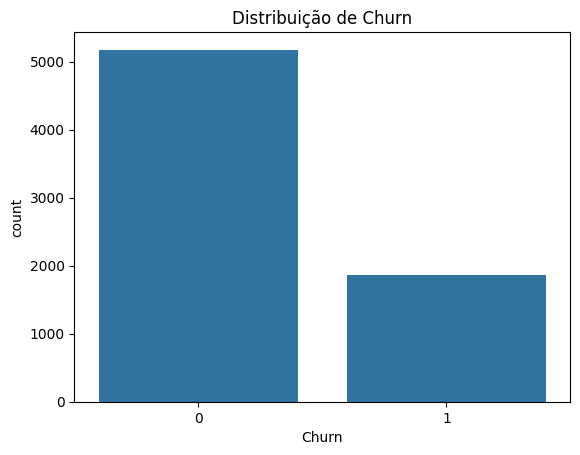

In [13]:
# Distribuição da variável alvo (Churn)
sns.countplot(data=df, x='Churn')
plt.title('Distribuição de Churn')
plt.show()

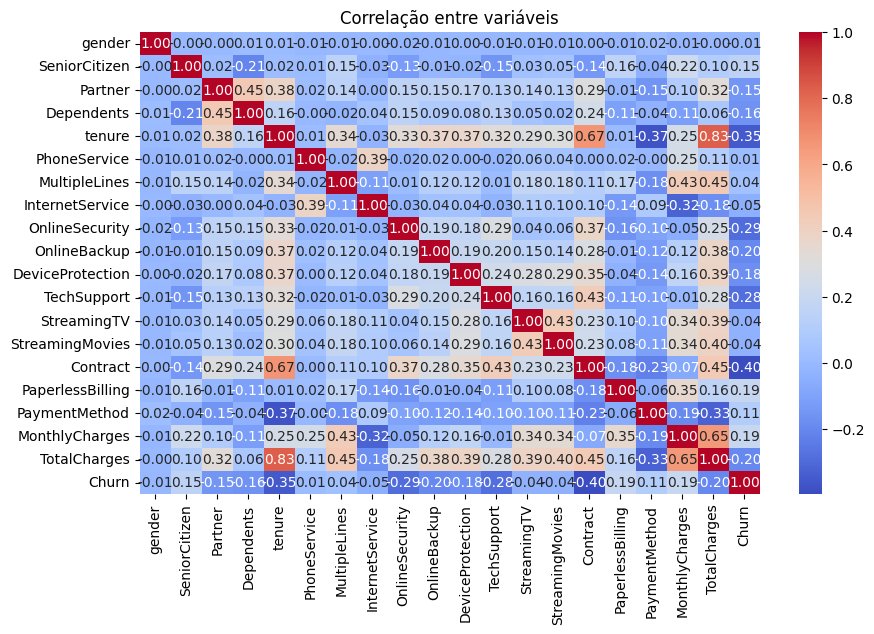

In [16]:
# Correlação entre variáveis
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlação entre variáveis')
plt.show()

In [17]:
#separando dados de treino e dados de teste
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1) #elimina o churn e trabalha as outras colunas como entradas
y = df['Churn'] #define churn como variável alvo

In [18]:
#normalizando variáveis numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [19]:
#separando dados de treino e dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#criando e treinando o modelo de rede neural
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Saída binária

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7215 - loss: 0.5591 - val_accuracy: 0.7986 - val_loss: 0.4233
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7780 - loss: 0.4539 - val_accuracy: 0.7968 - val_loss: 0.4288
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7799 - loss: 0.4490 - val_accuracy: 0.7977 - val_loss: 0.4153
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7845 - loss: 0.4545 - val_accuracy: 0.7986 - val_loss: 0.4139
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7822 - loss: 0.4363 - val_accuracy: 0.7986 - val_loss: 0.4134
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7932 - loss: 0.4358 - val_accuracy: 0.8039 - val_loss: 0.4105
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7955 - loss: 0.4326 - val_accuracy: 0.8021 - val_loss: 0.4096
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7913 - loss: 0.4227 - val_accuracy: 0.8030 - val_

Acurácia no teste: 0.81
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



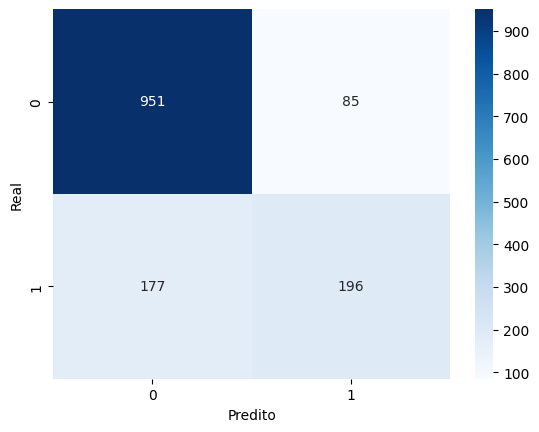

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# Avaliar no teste
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia no teste: {acc:.2f}")

# Predições e métricas
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()


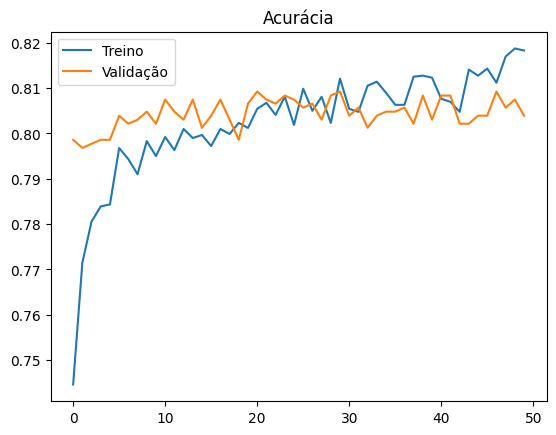

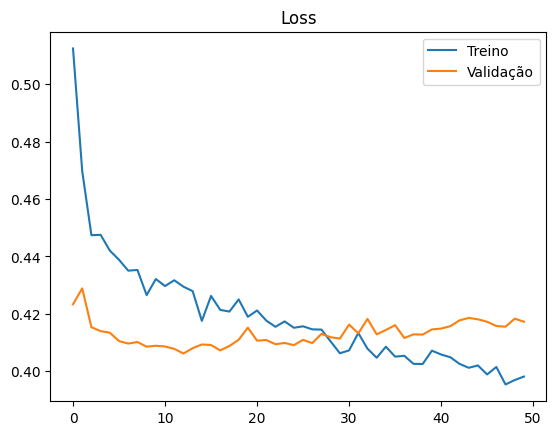

In [24]:
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss')
plt.legend()
plt.show()


In [25]:
best_epoch_acc = np.argmax(history.history['val_accuracy']) + 1
best_epoch_loss = np.argmin(history.history['val_loss']) + 1

print("Melhor epoch pela val_accuracy:", best_epoch_acc)
print("Melhor epoch pela val_loss:", best_epoch_loss)

Melhor epoch pela val_accuracy: 21
Melhor epoch pela val_loss: 13
